Looking at overlap of proteins between and within projects

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

sys.path.append('../')

In [2]:
data_nsaf = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_analysis/preprocessing/NSAF_50.csv", index_col = "assay_id")
data_nsaf = np.log2(data_nsaf)

meta = pd.read_csv("../../Metadata/unified_metadata.csv")
meta = meta[meta.assay_id.isin(data_nsaf.index)]

groups = pd.read_csv("../../Metadata/group_cells_annotation.csv", sep =";", index_col="Unnamed: 0")
meta["Group"] = meta.cell_line.apply(lambda x: groups[groups.cell_line == x]["group"].values[0])
meta = meta.set_index("assay_id")

data_nsaf.sort_index(inplace=True)
meta.sort_index(inplace=True)

In [20]:
def calculate_overlap(meta):

    overlap_tissue = {}
    for index in meta.index:
        overlap_tissue[index] = []
        index_prot = set(data_nsaf.loc[index, data_nsaf.loc[index].notna()].index.tolist())
        
        for comp_id in meta.index:
            comp_id_prot = set(data_nsaf.loc[comp_id, data_nsaf.loc[comp_id].notna()].index.tolist())

            value = len(index_prot.intersection(comp_id_prot)) / max(len(index_prot), len(comp_id_prot))

            overlap_tissue[index].append(value)
    return overlap_tissue

def lutinize_meta(meta, col):
    colors = sns.color_palette("Paired") + sns.color_palette("dark") + sns.color_palette("bright") + sns.color_palette("pastel") + sns.color_palette("Set2")
    
    colormap = {}
    for i, pxd in enumerate(meta[col].unique()):
        colormap[pxd] = colors[i]

    meta[f"lut_{col}"] = meta[col].apply(lambda x: colormap[x])

def make_clustermap_tissue(tissue):

    tissue_meta = meta[(meta.Group == tissue) & (meta.index.isin(data_nsaf.index))]

    print("Calculating overlap")
    overlap_tissue = calculate_overlap(tissue_meta)
    print("Overlap calculated")
    
    lutinize_meta(tissue_meta, "PXD_accession")
    lutinize_meta(tissue_meta, "cell_line")

    print("Generating clustermap")
    sns.clustermap(pd.DataFrame(overlap_tissue, index=overlap_tissue.keys()), row_colors= tissue_meta.lut_PXD_accession,
               col_colors= tissue_meta.lut_cell_line, vmin = 0, vmax = 1)
    plt.title(tissue)

def make_clustermap_cell(cell):

    cell_meta = meta[(meta.cell_line == cell) & (meta.index.isin(data_nsaf.index))]

    print("Calculating overlap")
    overlap_tissue = calculate_overlap(cell_meta)
    print("Overlap calculated")
    
    lutinize_meta(cell_meta, "PXD_accession")
    lutinize_meta(cell_meta, "treatment")

    print("Generating clustermap")
    sns.clustermap(pd.DataFrame(overlap_tissue, index=overlap_tissue.keys()), row_colors= cell_meta.lut_PXD_accession,
               col_colors= cell_meta.lut_treatment, vmin = 0, vmax = 1)

def make_clustermap_all(meta):
    meta = meta[(meta.index.isin(data_nsaf.index))]

    print("Calculating overlap")
    overlap_tissue = calculate_overlap(meta)
    print("Overlap calculated")

    lutinize_meta(meta, "PXD_accession")
    lutinize_meta(meta, "Group")

    print("Generating clustermap")
    sns.clustermap(pd.DataFrame(overlap_tissue, index=overlap_tissue.keys()), row_colors= meta.lut_PXD_accession,
               col_colors= meta.lut_Group, vmin = 0, vmax = 1)

In [14]:
colors = sns.color_palette("Paired") + sns.color_palette("dark") + sns.color_palette("bright") + sns.color_palette("pastel") + sns.color_palette("Set2")
    
colormap = {}
for i, pxd in enumerate(meta[meta.PXD_accession=="PXD007543"].sub_cell.unique()):
    colormap[pxd] = colors[i]

lut = meta[meta.PXD_accession=="PXD007543"].sub_cell.apply(lambda x: colormap[x])

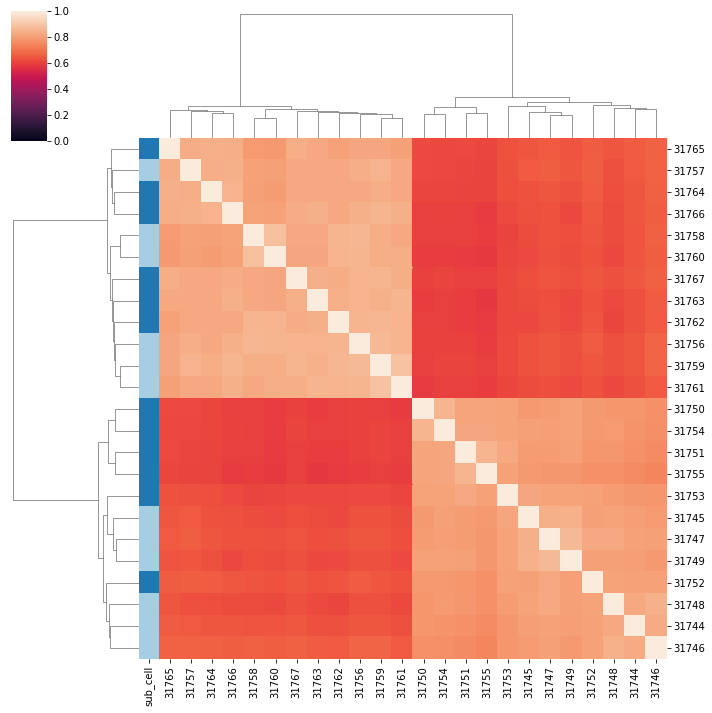

In [15]:
# Clusters formed by enzyme
overlap_tissue = calculate_overlap(meta[meta.PXD_accession=="PXD007543"])
sns.clustermap(pd.DataFrame(overlap_tissue, index=overlap_tissue.keys()), row_colors= lut,
               vmin = 0, vmax = 1)

In [5]:
meta[meta.Group == "Ductal_breast"].PXD_accession.value_counts()

PXD008222    38
PXD008719    24
PXD007543    24
PXD001352     4
PXD002057     3
PXD004452     2
PXD009442     2
PXD001327     2
PXD005940     1
Name: PXD_accession, dtype: int64

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


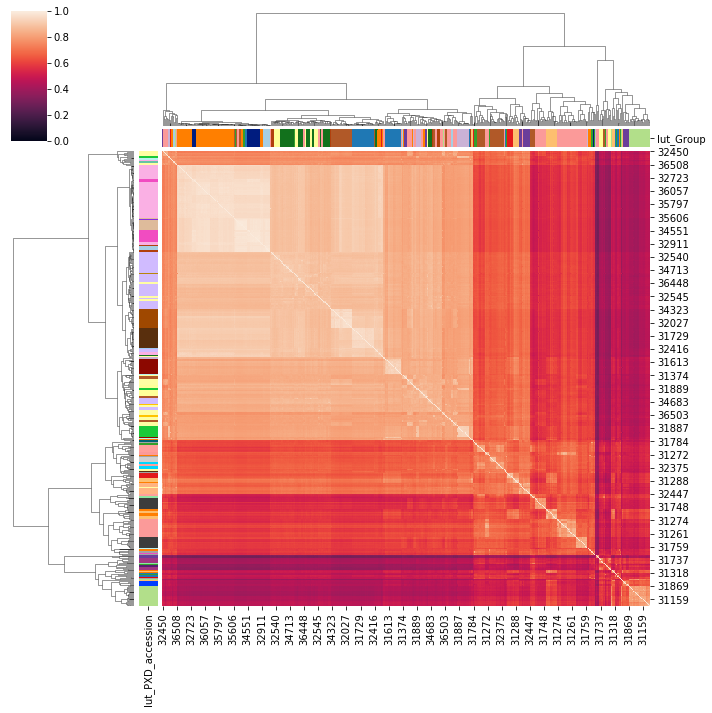

In [61]:
make_clustermap_all(meta)

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap


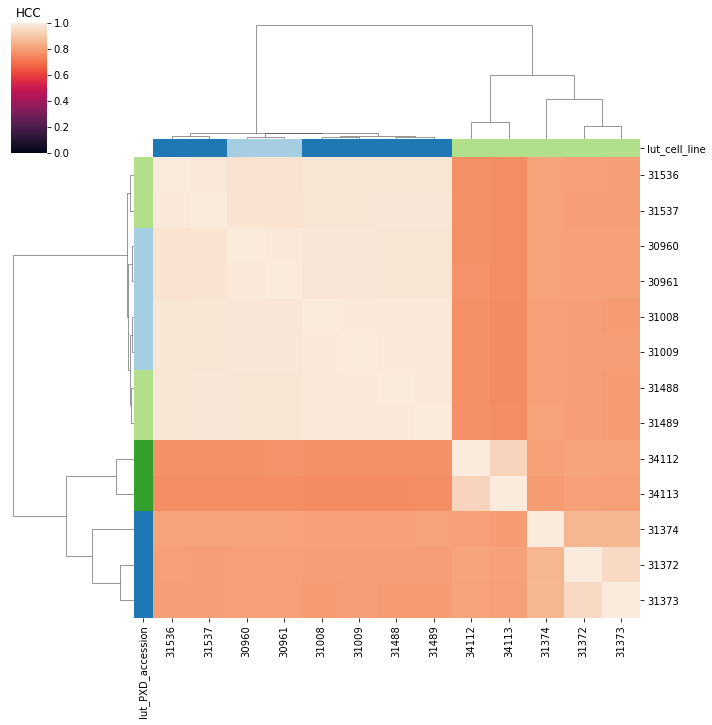

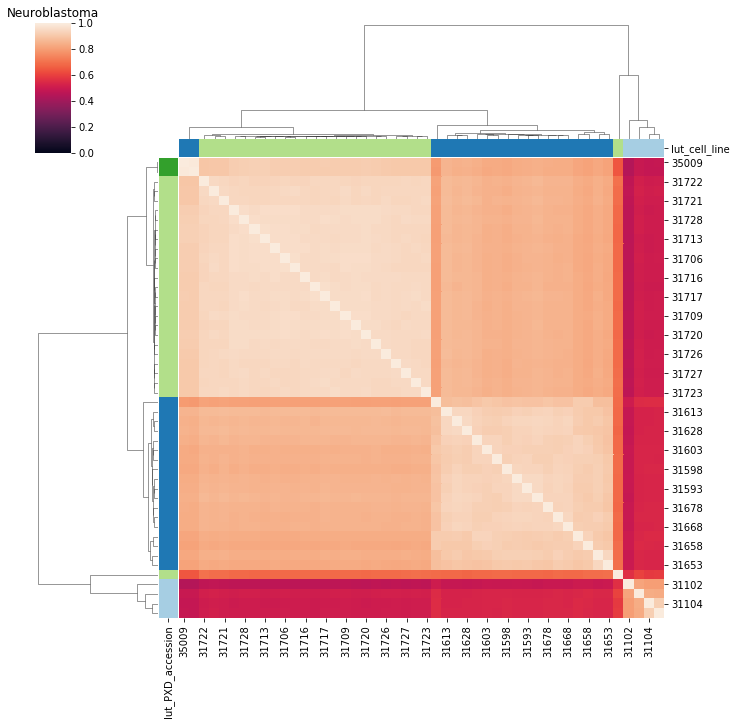

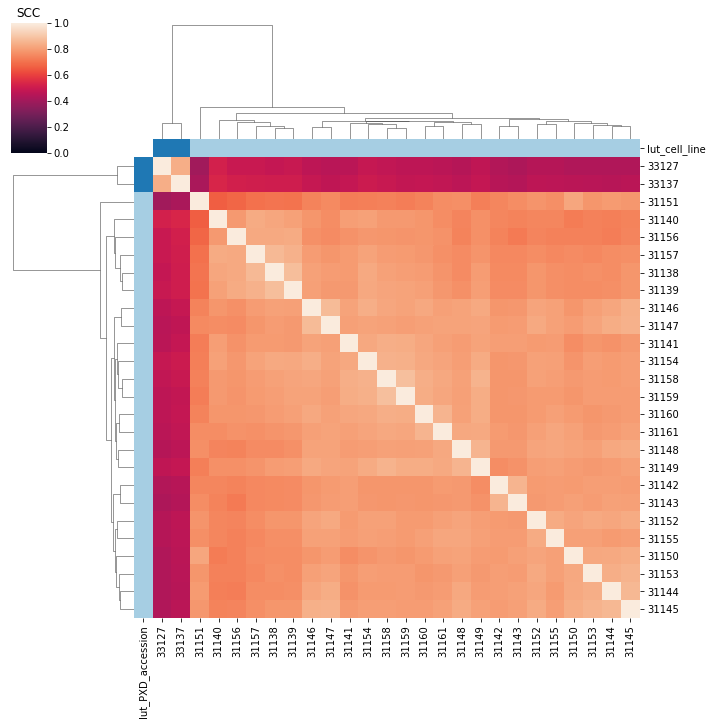

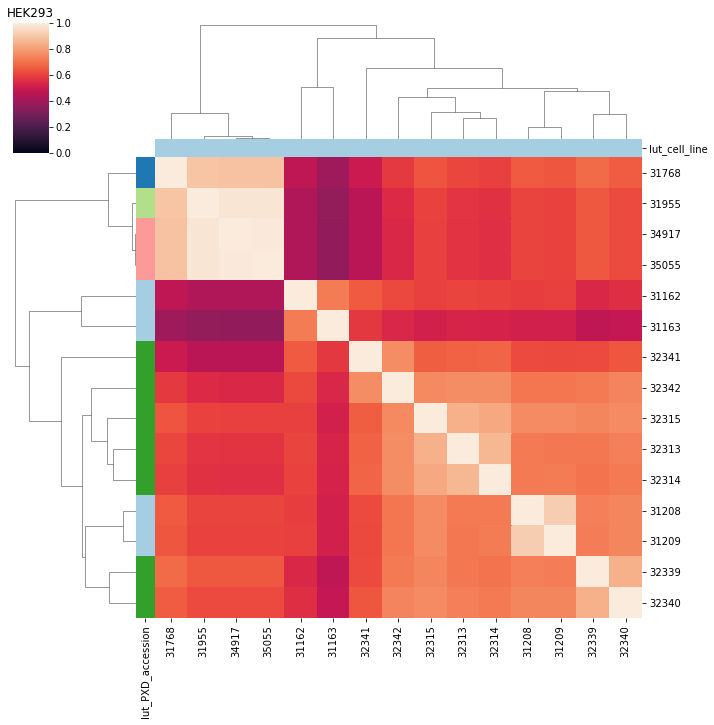

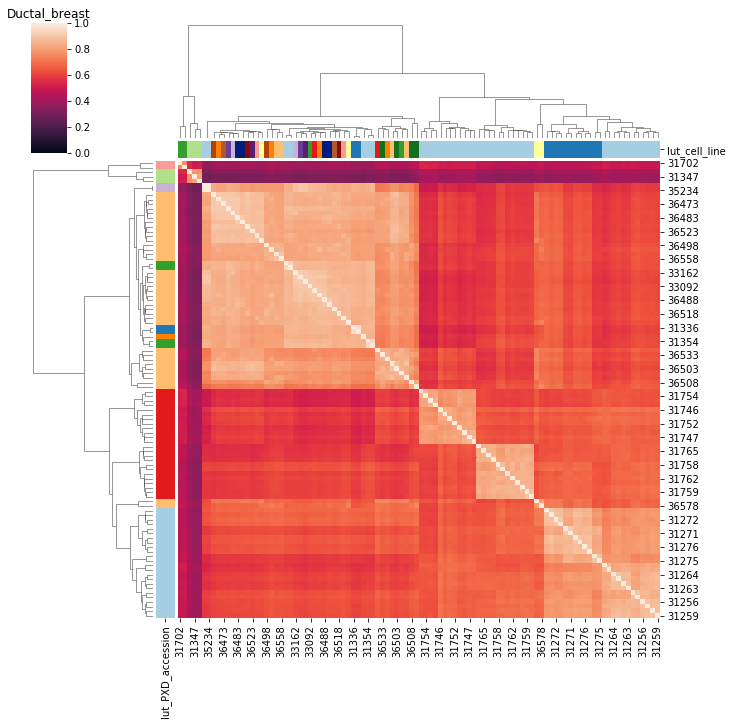

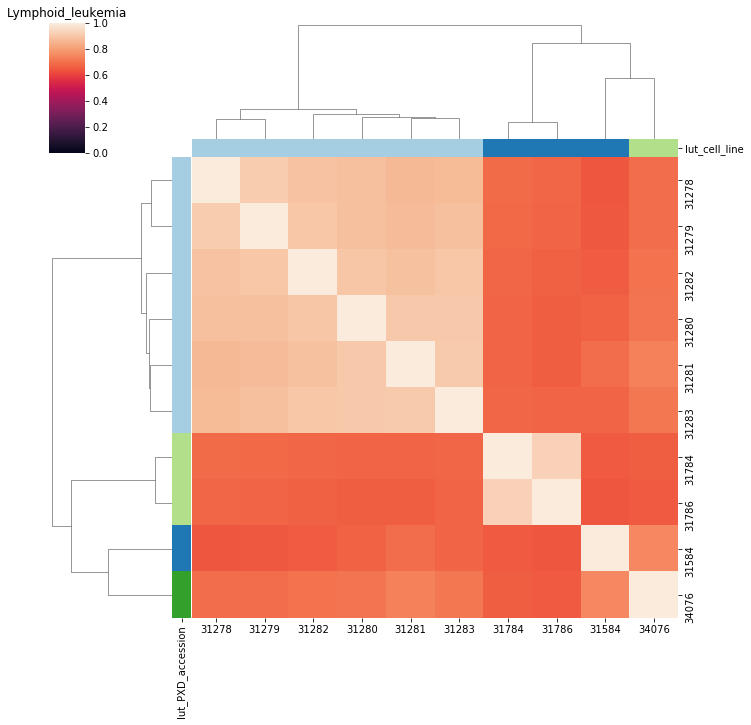

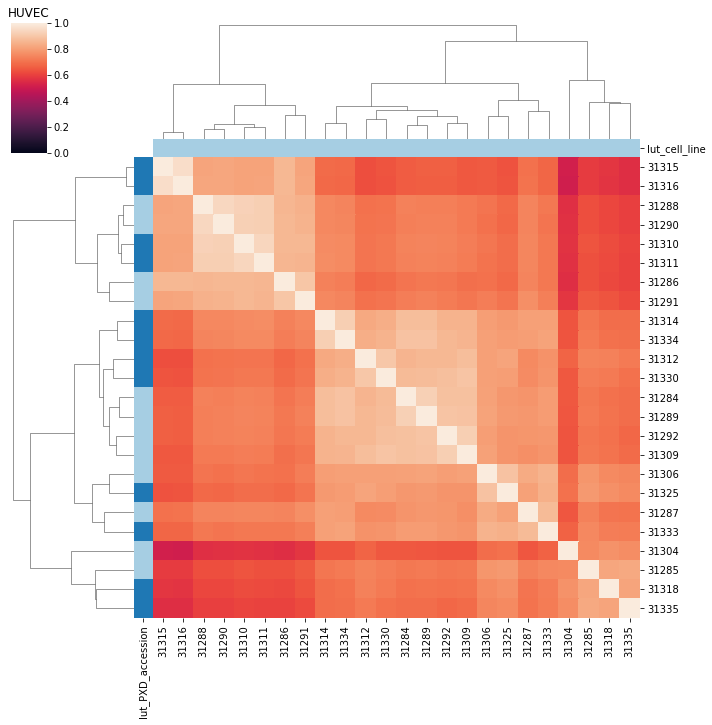

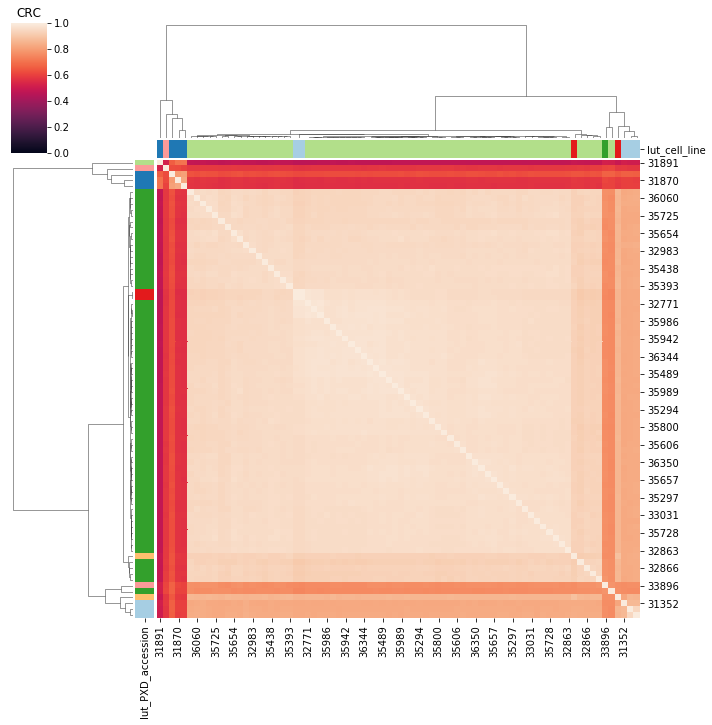

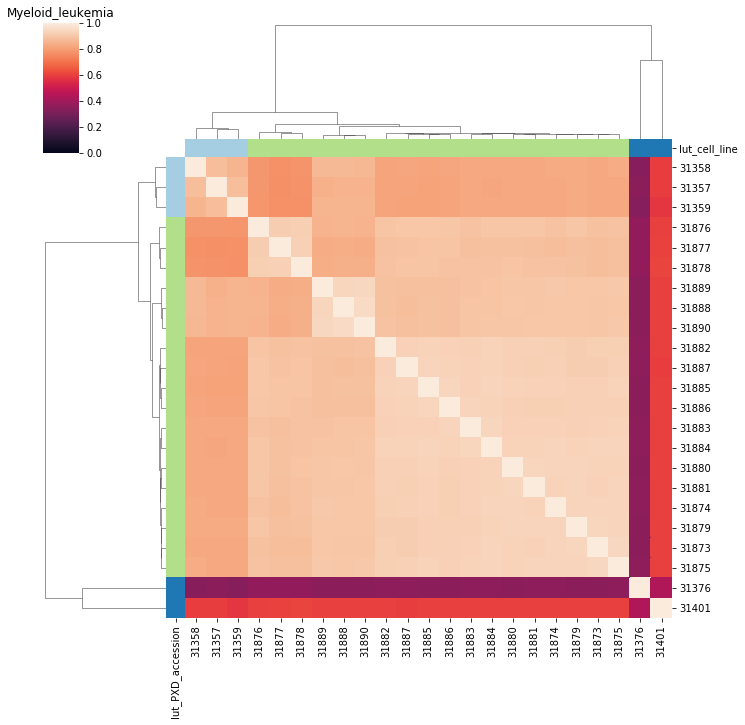

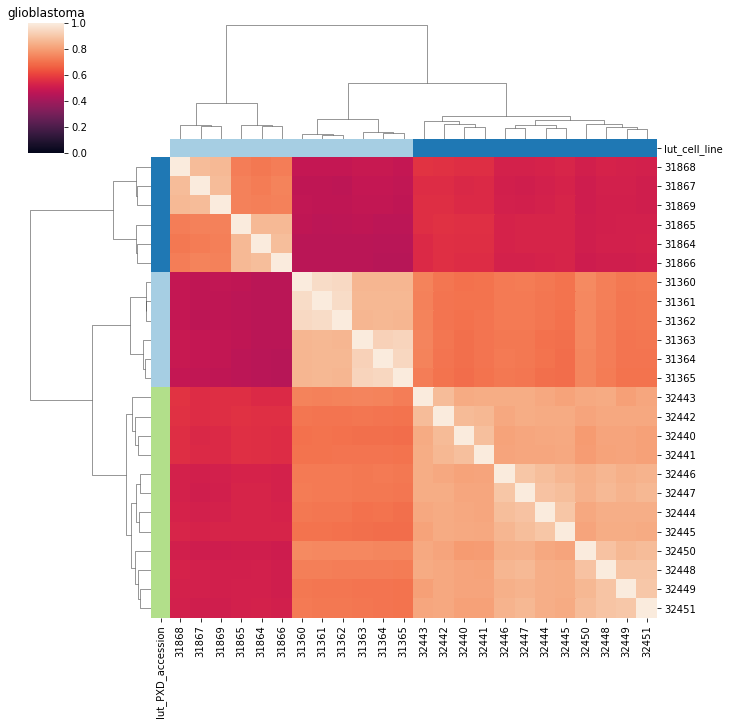

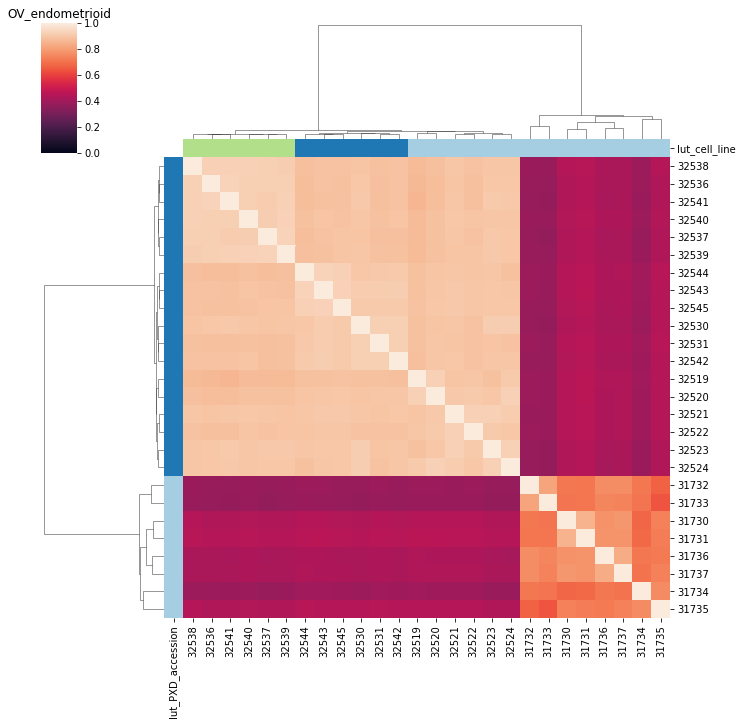

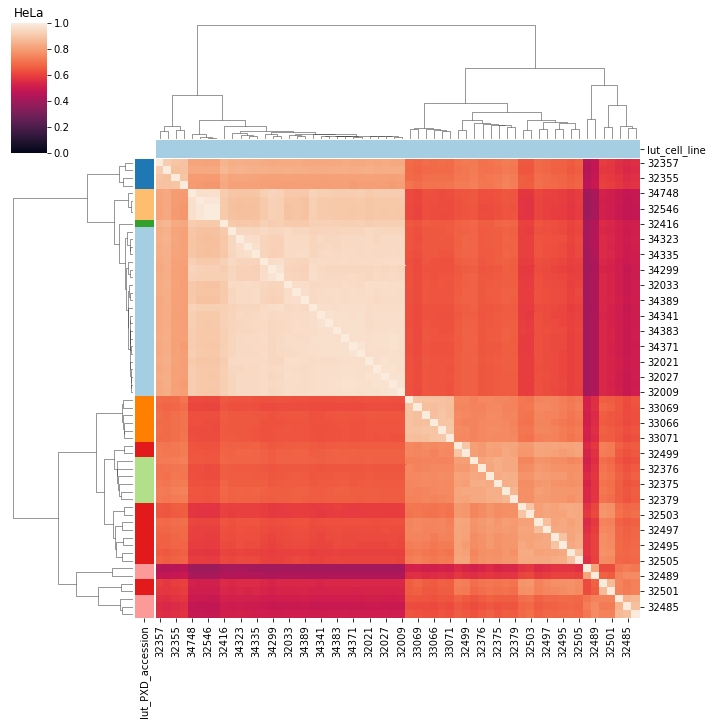

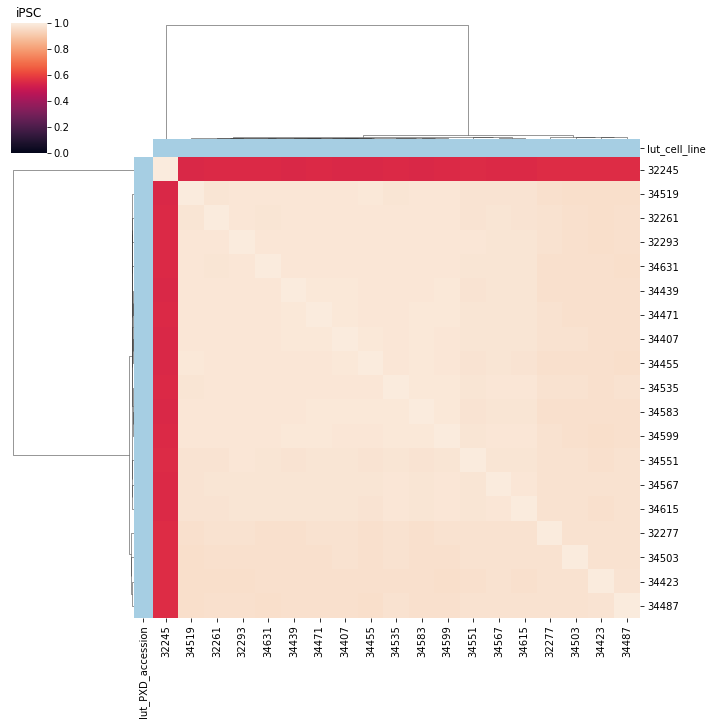

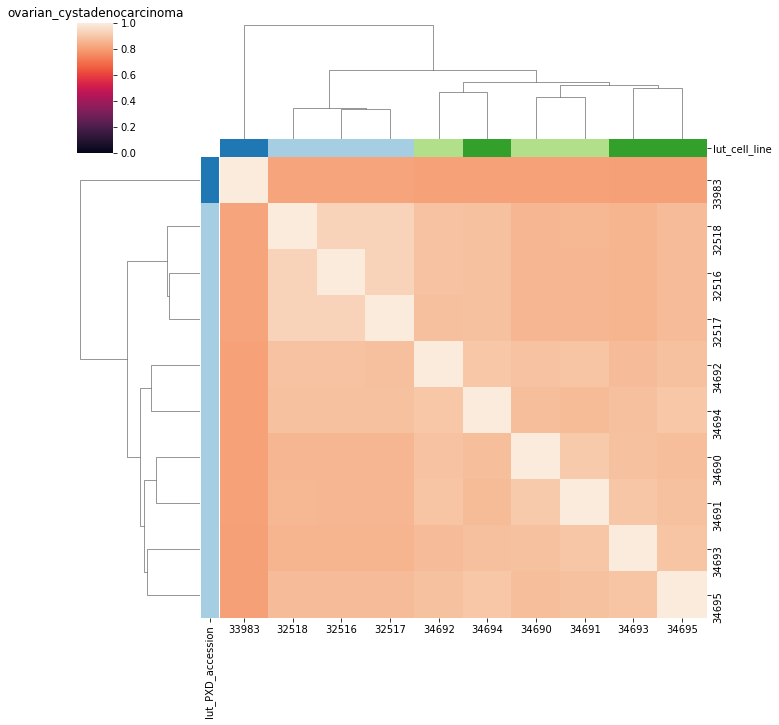

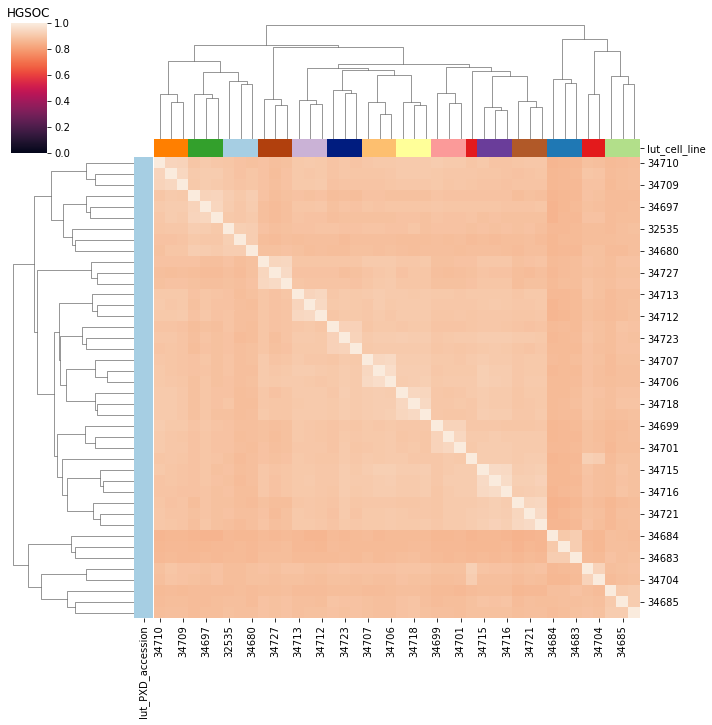

In [23]:
for group in meta.Group.unique():
    make_clustermap_tissue(group)

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap
Calculating overlap
Overlap calculated
Generating clustermap


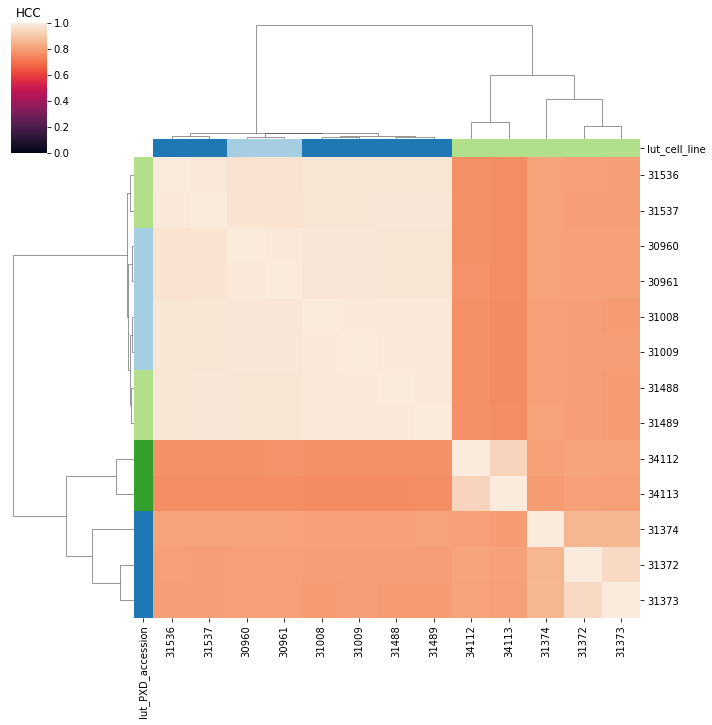

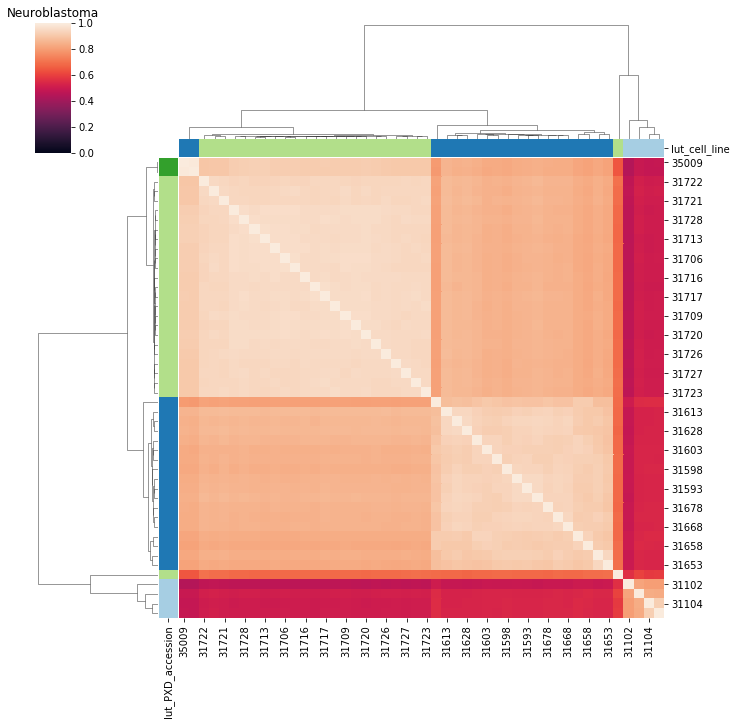

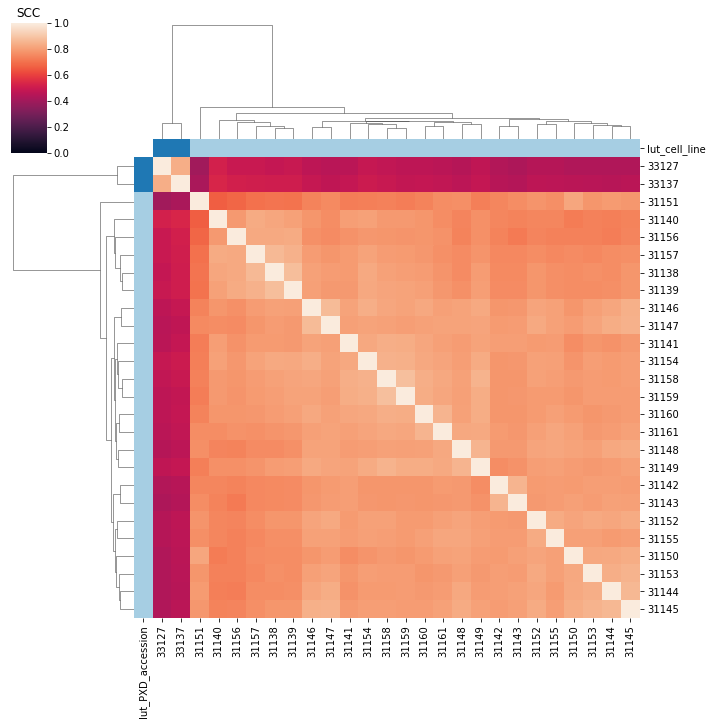

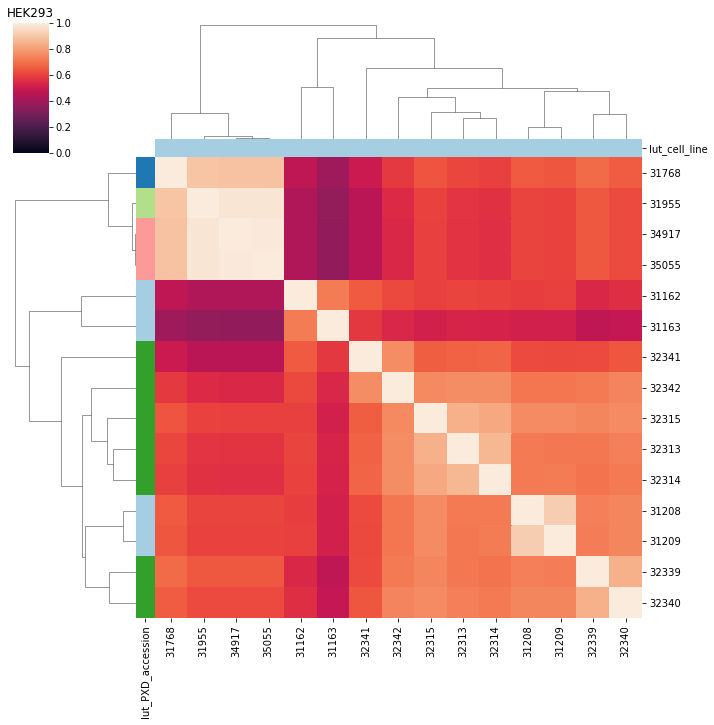

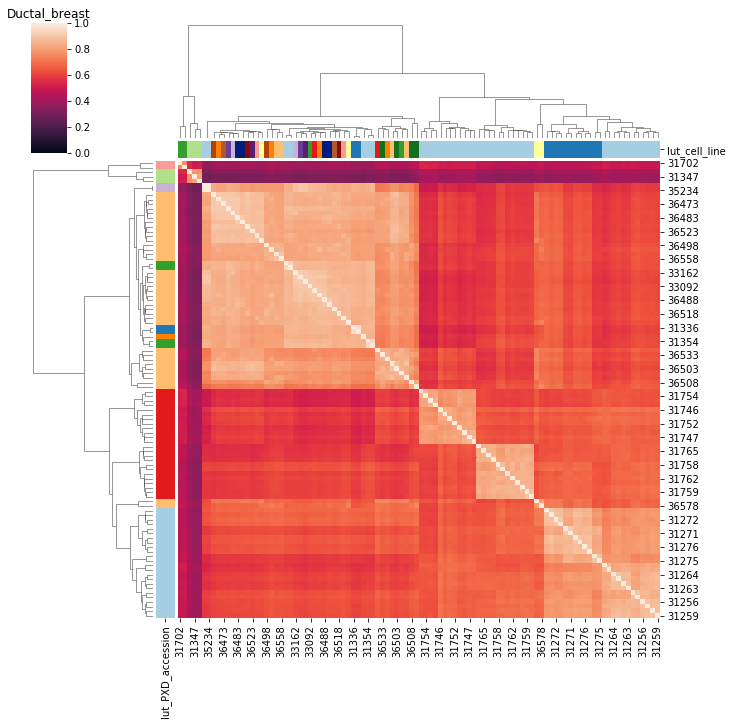

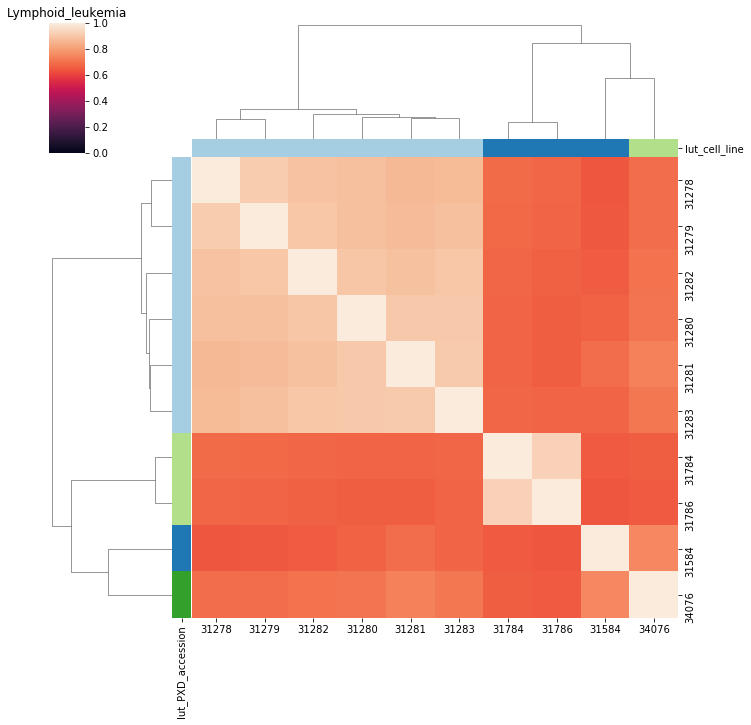

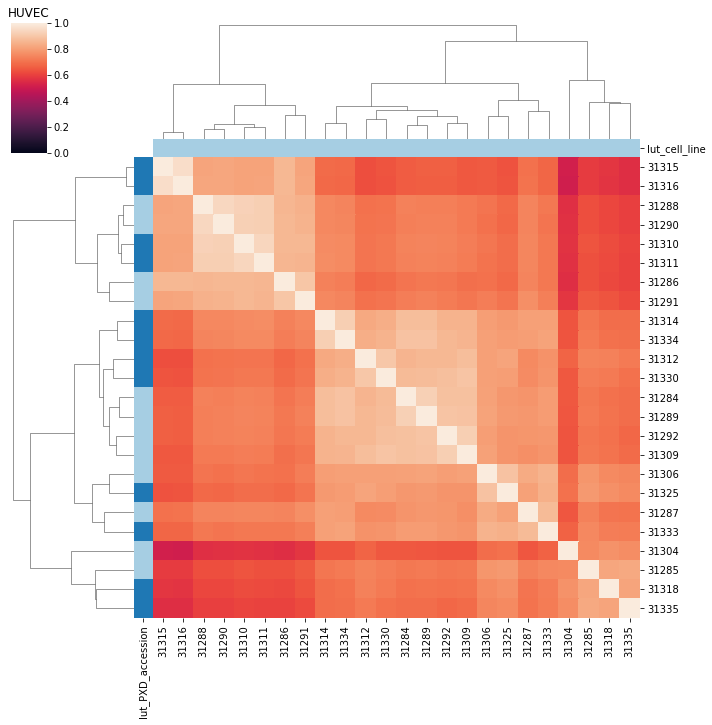

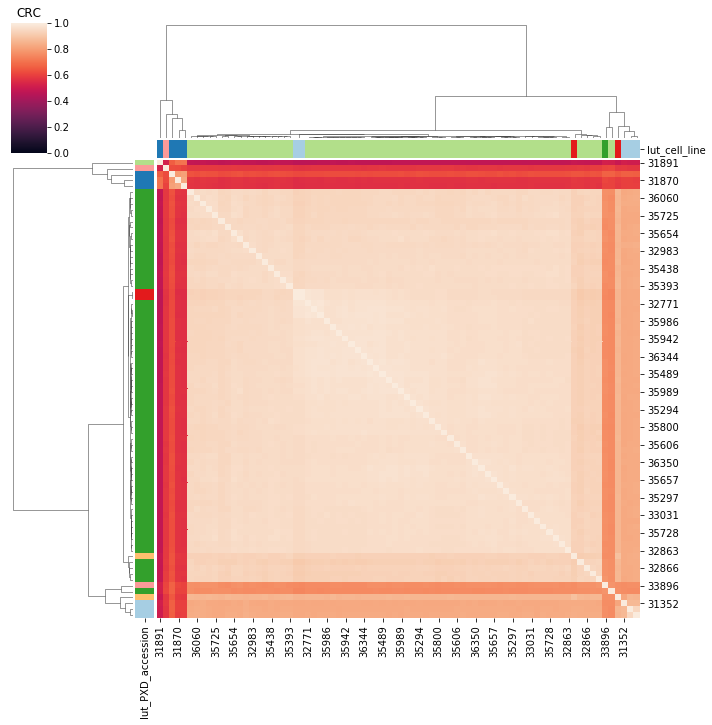

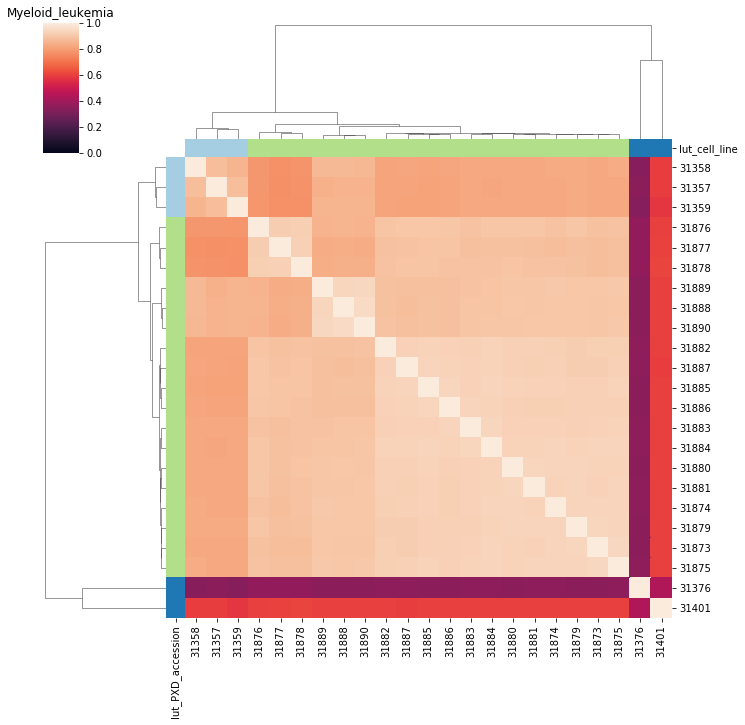

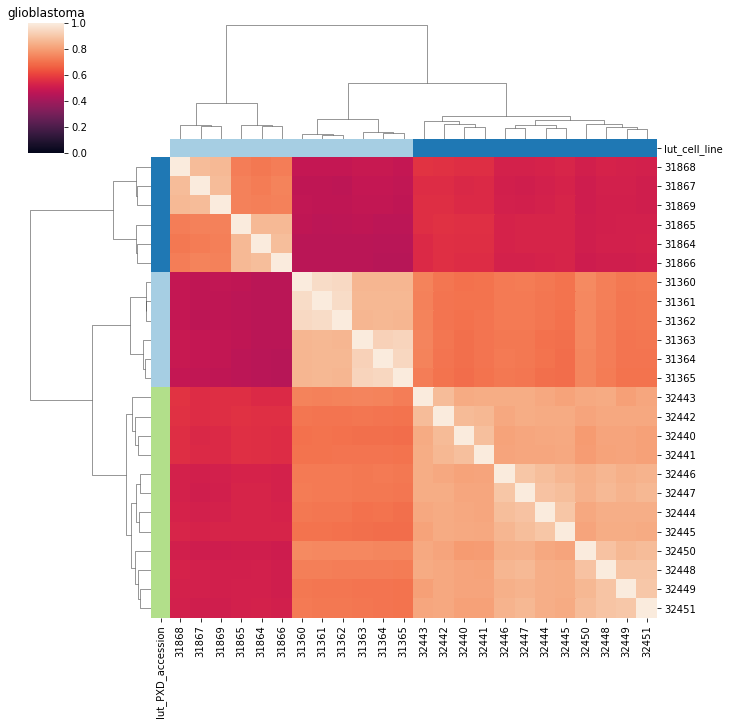

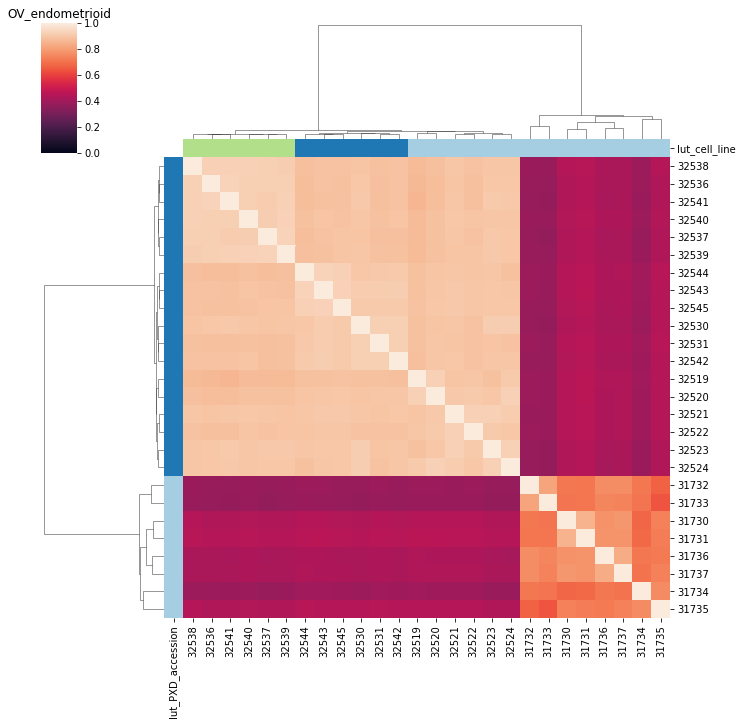

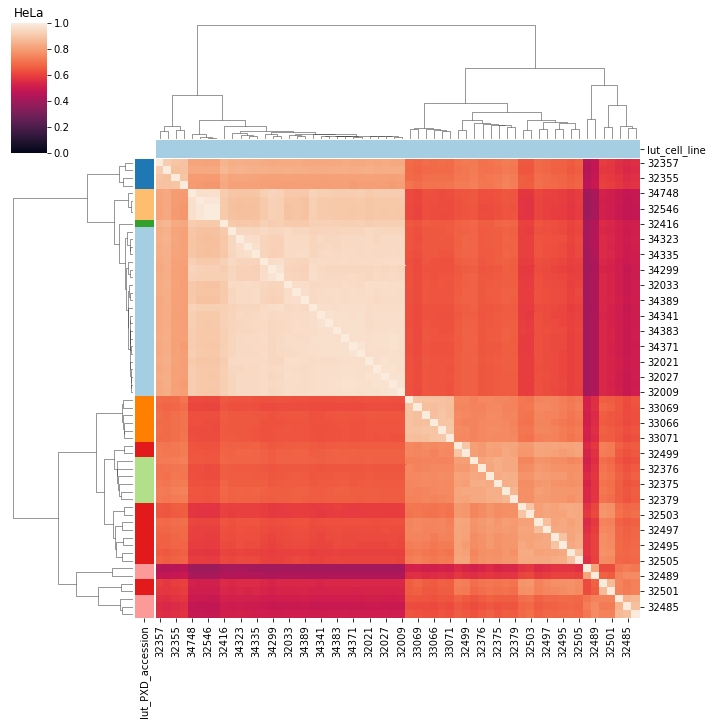

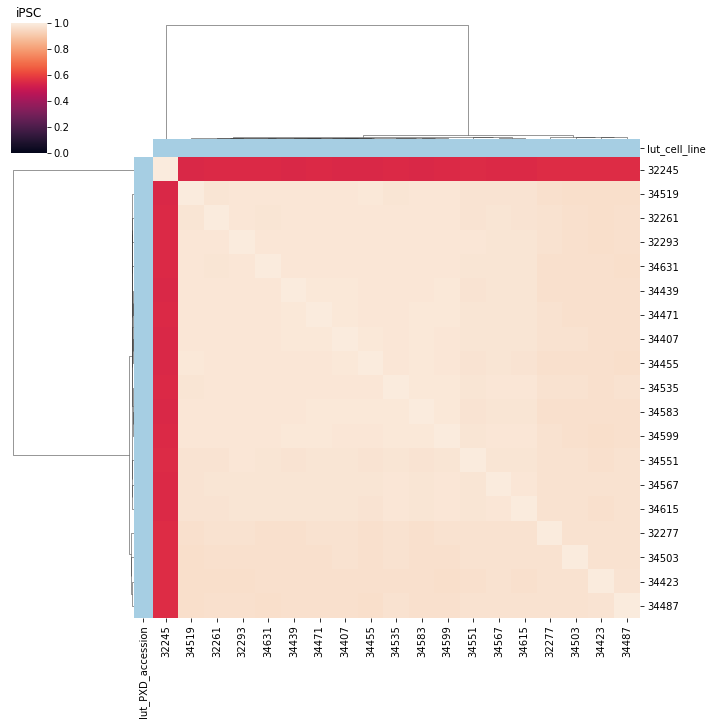

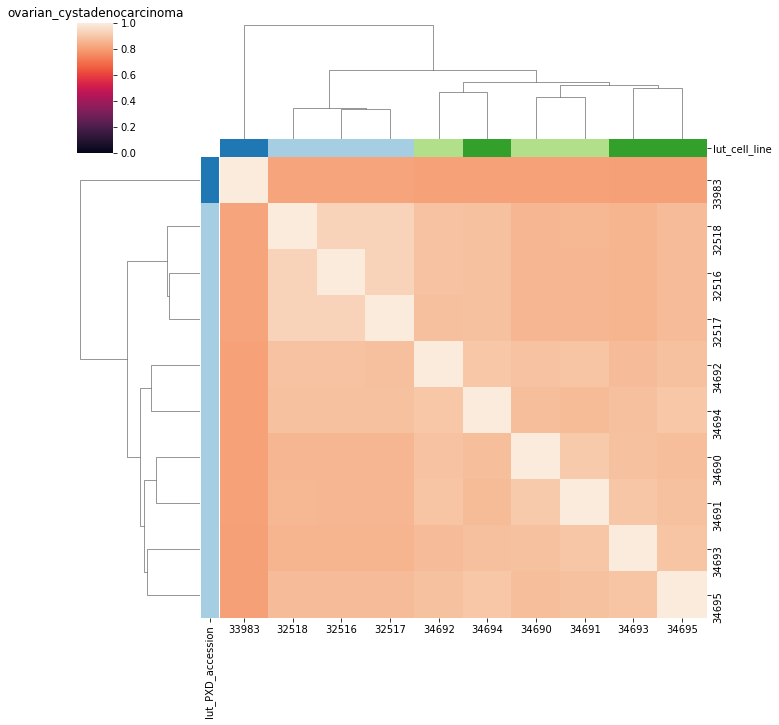

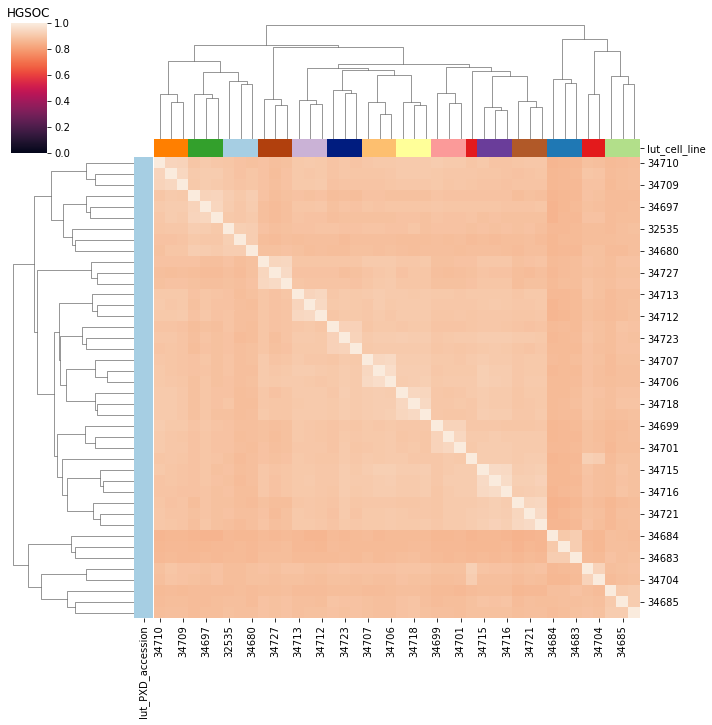

In [54]:
for group in meta.Group.unique():
    make_clustermap_tissue(group)

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


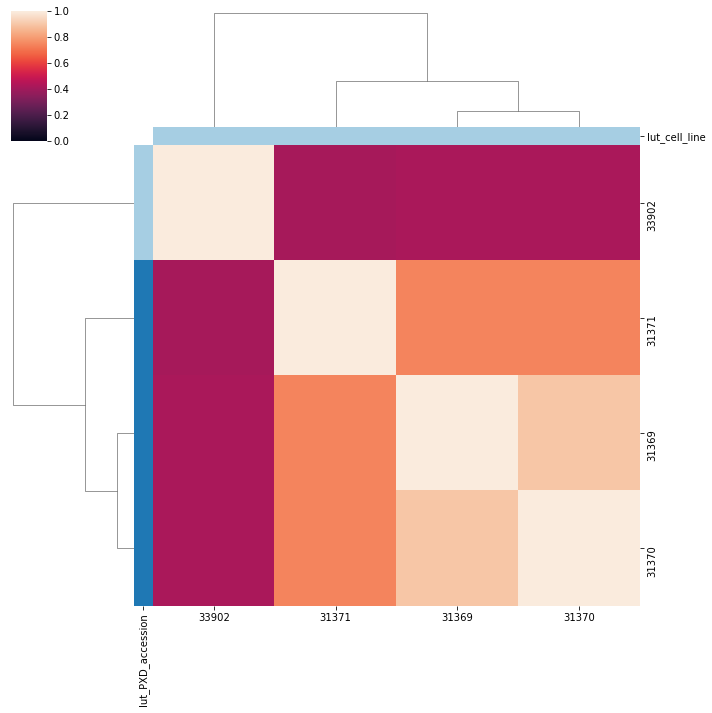

In [37]:
make_clustermap_tissue("prostate")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


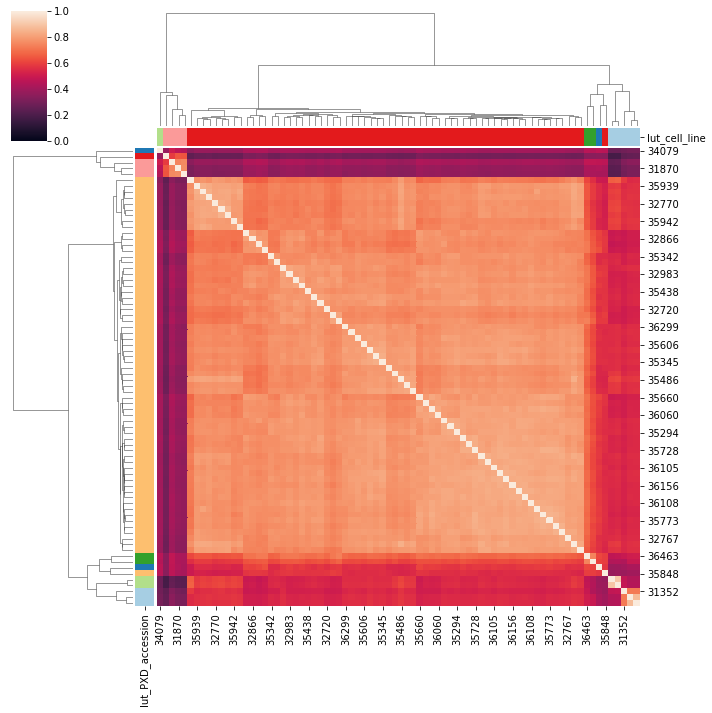

In [38]:
make_clustermap_tissue("colon")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


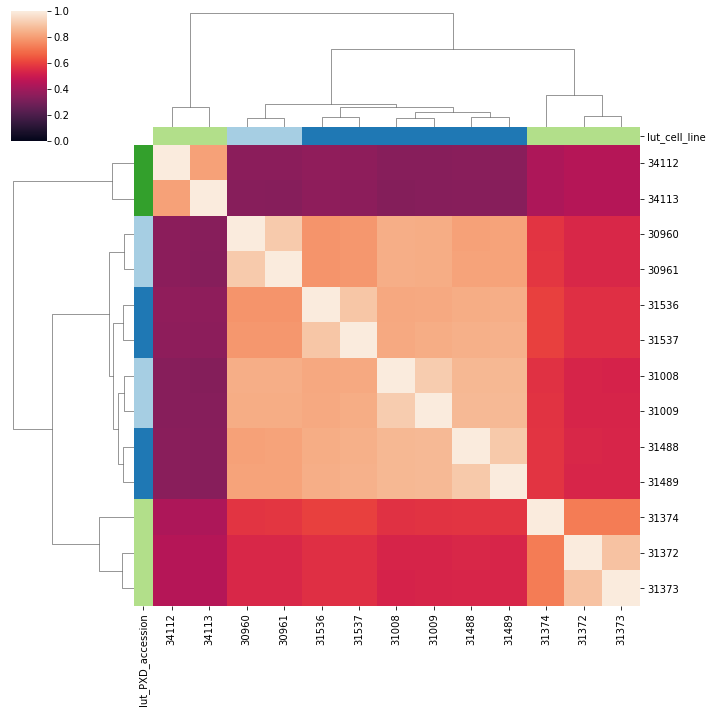

In [39]:
make_clustermap_tissue("liver")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


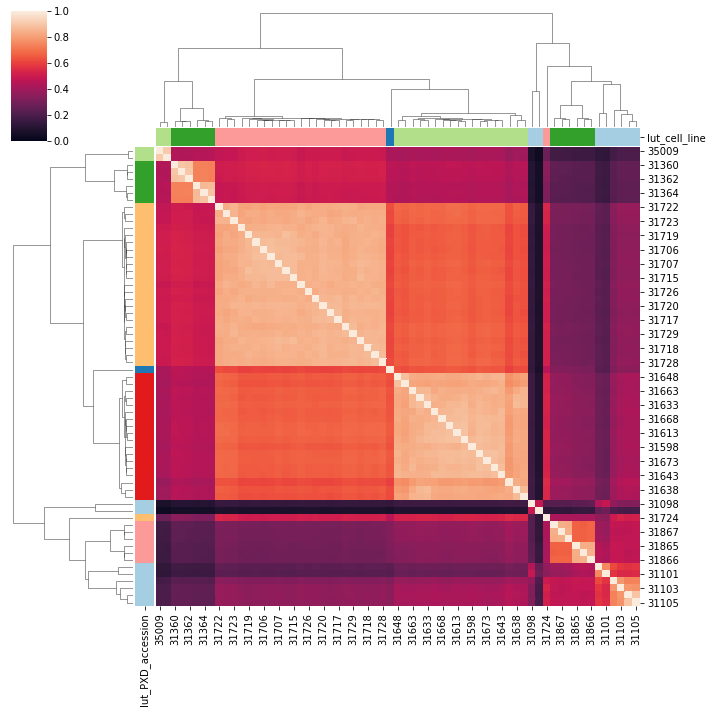

In [40]:
make_clustermap_tissue("brain")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


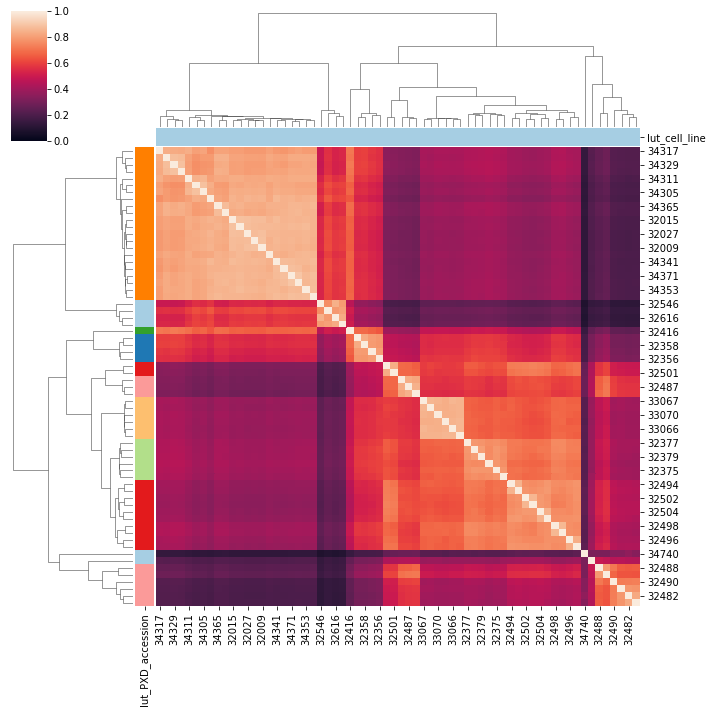

In [41]:
make_clustermap_tissue("cervix")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


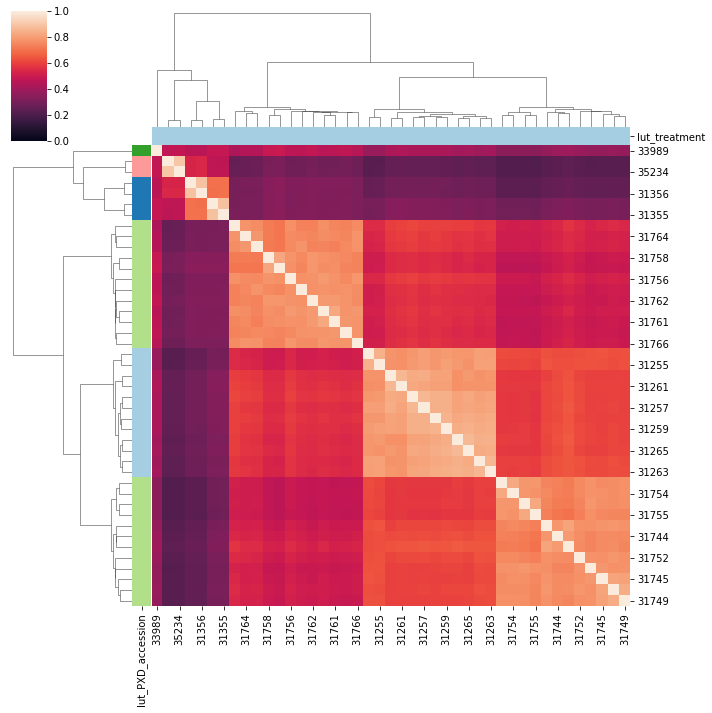

In [49]:
make_clustermap_cell("MCF7")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


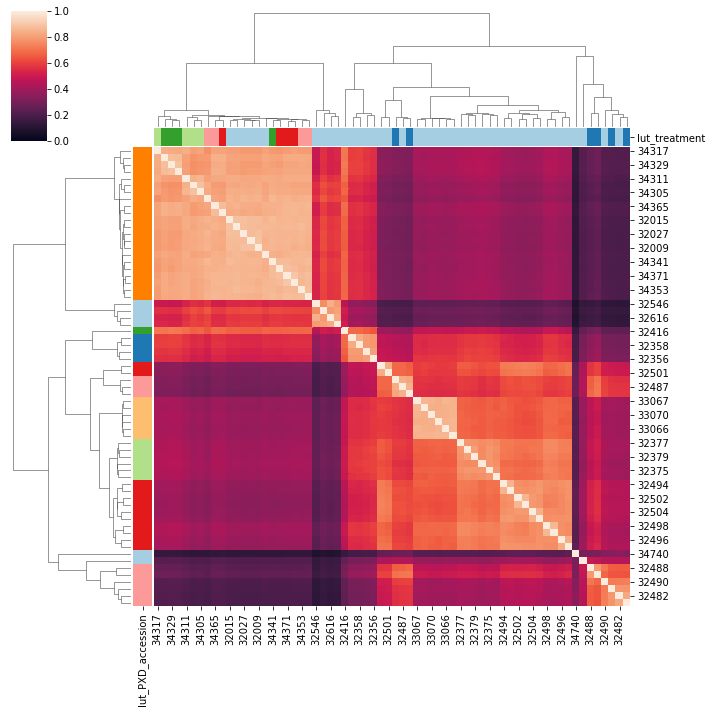

In [50]:
make_clustermap_cell("HeLa")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


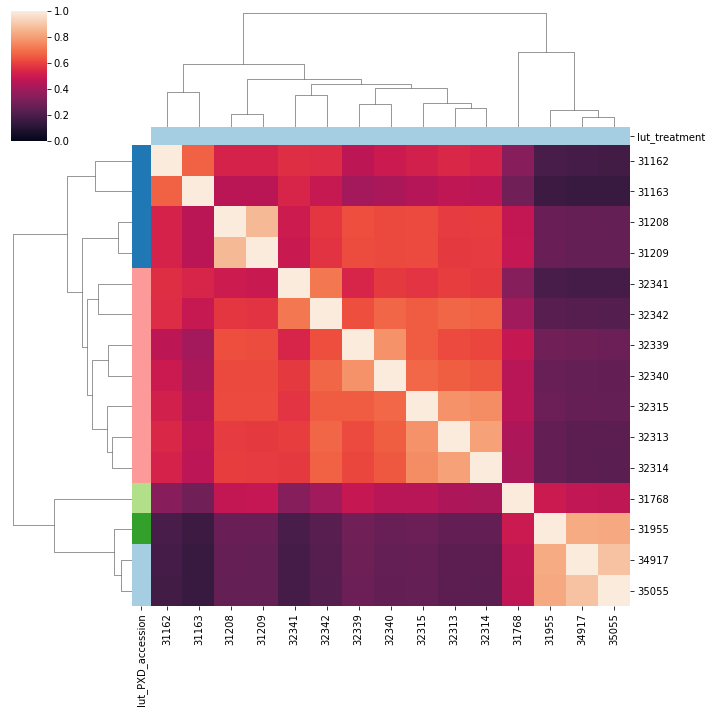

In [51]:
make_clustermap_cell("HEK293")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


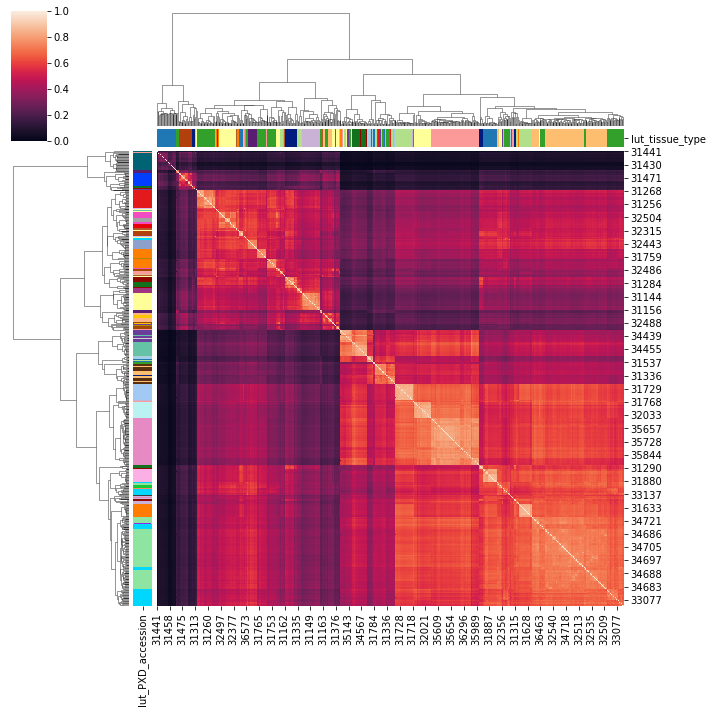

In [52]:
make_clustermap_all()

In [ ]:
prot_vers = pd.concat([nsaf_data.notna().sum(axis = 1), metadata.set_index("assay_id")["ionbot_version"]], axis = 1).rename(columns = {0: "proteins"})

In [29]:
prot_vers

,proteins,ionbot_version
assay_id,,
30960,8180,IONBOT_v0.8.0
30961,8166,IONBOT_v0.8.0
31008,8117,IONBOT_v0.8.0
31009,8040,IONBOT_v0.8.0
31098,591,IONBOT_v0.6.2
...,...,...
36558,2895,IONBOT_v0.7.0
36563,2540,IONBOT_v0.7.0
36568,2789,IONBOT_v0.7.0


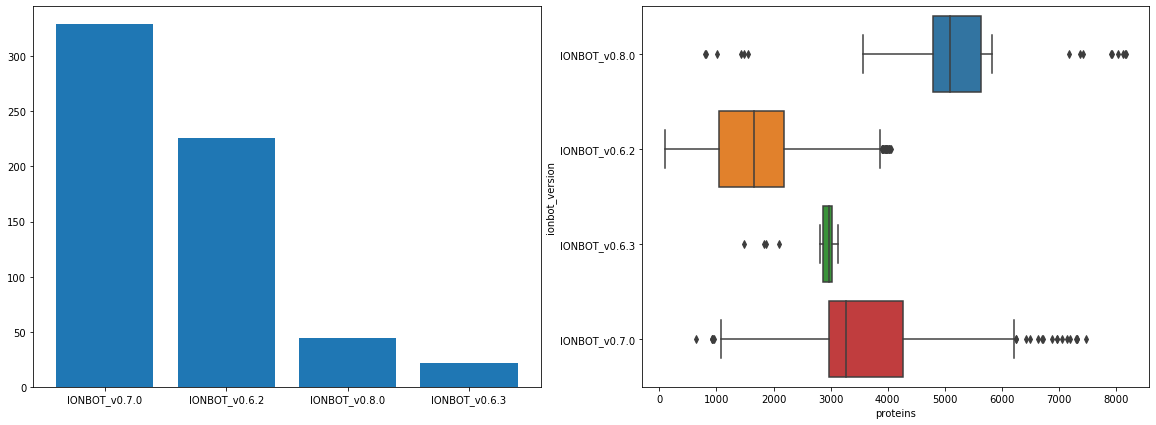

In [35]:
fig, ax = plt.subplots(1,2,figsize= (20,7))

ax[0].bar(x=prot_vers.ionbot_version.value_counts().index, height=prot_vers.ionbot_version.value_counts())
sns.boxplot(data = prot_vers, 
           x = "proteins", y = "ionbot_version", ax = ax[1])

In [38]:
prot_vers[prot_vers.proteins < 1000]

,proteins,ionbot_version
assay_id,,
31098,591,IONBOT_v0.6.2
31099,312,IONBOT_v0.6.2
31298,470,IONBOT_v0.6.2
31308,522,IONBOT_v0.6.2
31313,509,IONBOT_v0.6.2
31324,587,IONBOT_v0.6.2
31346,808,IONBOT_v0.8.0
31348,795,IONBOT_v0.8.0
31429,100,IONBOT_v0.6.2
